##### IMPROVED TRACKING SYSTEM FOR ONLINE SOFTWARE PIRACY USING HYBRID ALGORITHMS

#### Data Preparation

In [1]:
# Importing The necesssary oackages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import pylab
import seaborn as sns 

#-- plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

np.random.seed(0)

In [2]:
# Loading the dataset

data = pd.read_csv('Datasets/software-data.csv')
df = pd.DataFrame(data)

In [3]:
# Visualizing the dataset

df.head(20)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,pirated,target
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,genuine
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,True,Pirated
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17,36,112,86,13,True,Pirated
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17,135,329,271,5,True,Pirated
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11,16,76,50,7,True,Pirated
5,31.0,2.0,1.0,2.0,111.0,582.52,0.08,12.25,47.55,7135.87,...,0,5,0,14,24,69,42,3,True,Pirated
6,78.0,9.0,5.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,17,True,Pirated
7,8.0,1.0,1.0,1.0,16.0,50.72,0.36,2.80,18.11,142.01,...,0,1,0,4,5,9,7,1,True,Pirated
8,24.0,2.0,1.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,3,True,Pirated
9,143.0,22.0,20.0,10.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,43,True,Pirated


In [4]:
df.shape

(10885, 23)

> **About this Software Piracy Prediction Dataset**
 
This is a data set made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.

>***Attribute Information:***
 1. loc                                    : numeric % McCabe's line count of code
 2. v(g)                                  : numeric % McCabe "cyclomatic complexity"
 3. ev(g)                                : numeric % McCabe "essential complexity"
 4. iv(g)                                 : numeric % McCabe "design complexity"
 5. n                                      : numeric % Halstead total operators + operands
 6. v                                       : numeric % Halstead "volume"
 7. l                                        : numeric % Halstead "program length"
 8. d                                      : numeric % Halstead "difficulty"
 9. i                                        : numeric % Halstead "intelligence"
 10. e                                     : numeric % Halstead "effort"
 11. b                                      : numeric % Halstead 
 12. t                                      : numeric % Halstead's time estimator
 13. lOCode                          : numeric % Halstead's line count
 14. lOComment                  : numeric % Halstead's count of lines of comments
 15. lOBlank                          : numeric % Halstead's count of blank lines
 16. lOCodeAndComment  : numeric
 17. uniq_Op                          : numeric % unique operators
 18. uniq_Opnd                     : numeric % unique operands
 19. total_Op                         : numeric % total operators
 20. total_Opnd                    : numeric % total operands
 21. branchCount                 : numeric % of the flow graph
 22. pirated                          : {false,true} % module has/has not one or more reported defects

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [6]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,10875,10876,10877,10878,10879,10880,10881,10882,10883,10884
loc,1.1,1.0,72.0,190.0,37.0,31.0,78.0,8.0,24.0,143.0,...,37.0,10.0,5.0,4.0,24.0,18.0,9.0,42.0,10.0,19.0
v(g),1.4,1.0,7.0,3.0,4.0,2.0,9.0,1.0,2.0,22.0,...,6.0,2.0,1.0,1.0,2.0,4.0,2.0,4.0,1.0,3.0
ev(g),1.4,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,20.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
iv(g),1.4,1.0,6.0,3.0,4.0,2.0,4.0,1.0,2.0,10.0,...,4.0,1.0,1.0,1.0,2.0,4.0,2.0,2.0,1.0,1.0
n,1.3,1.0,198.0,600.0,126.0,111.0,0.0,16.0,0.0,0.0,...,104.0,21.0,4.0,5.0,95.0,52.0,30.0,103.0,36.0,58.0


In [7]:
df[['lOCode', 'lOComment', 'lOBlank', 
      'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 
      'total_Op', 'total_Opnd', 'branchCount', 'pirated', 'target']].head(10)

,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,pirated,target
0,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False,genuine
1,1,1,1,1,1,1,1,1,1,True,Pirated
2,51,10,8,1,17,36,112,86,13,True,Pirated
3,129,29,28,2,17,135,329,271,5,True,Pirated
4,28,1,6,0,11,16,76,50,7,True,Pirated
5,19,0,5,0,14,24,69,42,3,True,Pirated
6,0,0,0,0,0,0,0,0,17,True,Pirated
7,5,0,1,0,4,5,9,7,1,True,Pirated
8,0,0,0,0,0,0,0,0,3,True,Pirated
9,0,0,0,0,0,0,0,0,43,True,Pirated


In [8]:
df[['loc', 'v(g)', 'ev(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't']].head(10)

,loc,v(g),ev(g),n,v,l,d,i,e,b,t
0,1.1,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30
1,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,72.0,7.0,1.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39
3,190.0,3.0,1.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37
4,37.0,4.0,1.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07
5,31.0,2.0,1.0,111.0,582.52,0.08,12.25,47.55,7135.87,0.19,396.44
6,78.0,9.0,5.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,8.0,1.0,1.0,16.0,50.72,0.36,2.80,18.11,142.01,0.02,7.89
8,24.0,2.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,143.0,22.0,20.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
pirated_true_false = df.groupby('pirated')['b'].apply(lambda x: x.count()) #defect rates (true/false)
print('Pirated False: ' , pirated_true_false[0])
print('Pirated True: ' , pirated_true_false[1])

Pirated False:  8779
Pirated True:  2106


> * **Histogram**

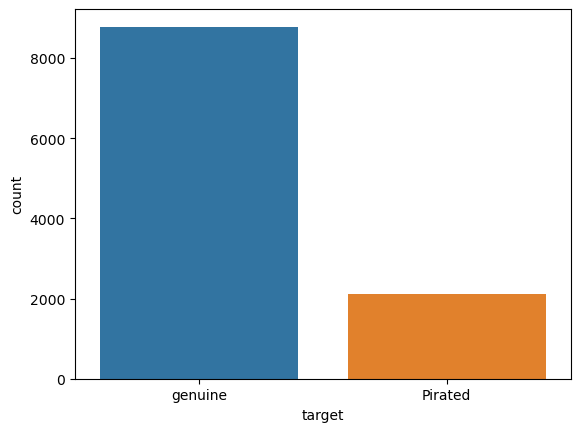

In [10]:
plt.figure()
sns.countplot(x = 'target', data = df);

> * **Covariance**

Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.

In [11]:
df.corr() #shows coveriance matrix

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,pirated
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,0.899965,0.750564,0.921918,0.612858,0.803573,0.278119,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,0.759635,0.709501,0.799915,0.384506,0.538366,0.209811,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,0.445693,0.315538,0.454604,0.294208,0.338243,0.190911,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,0.743013,0.757702,0.775873,0.351583,0.541296,0.207028,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,0.983938,0.716536,0.944383,0.596374,0.798561,0.284391,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,0.999696,0.800000,0.962078,0.576844,0.792330,0.266537,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,-0.196147,-0.062026,-0.218373,-0.165885,-0.223670,-0.106117,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,0.751835,0.574298,0.768188,0.502121,0.637211,0.253793,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,0.598341,0.209268,0.563920,0.392551,0.572352,0.217810,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,0.799868,1.000000,0.809070,0.384806,0.600649,0.148693,0.086036


> * **Heatmap**

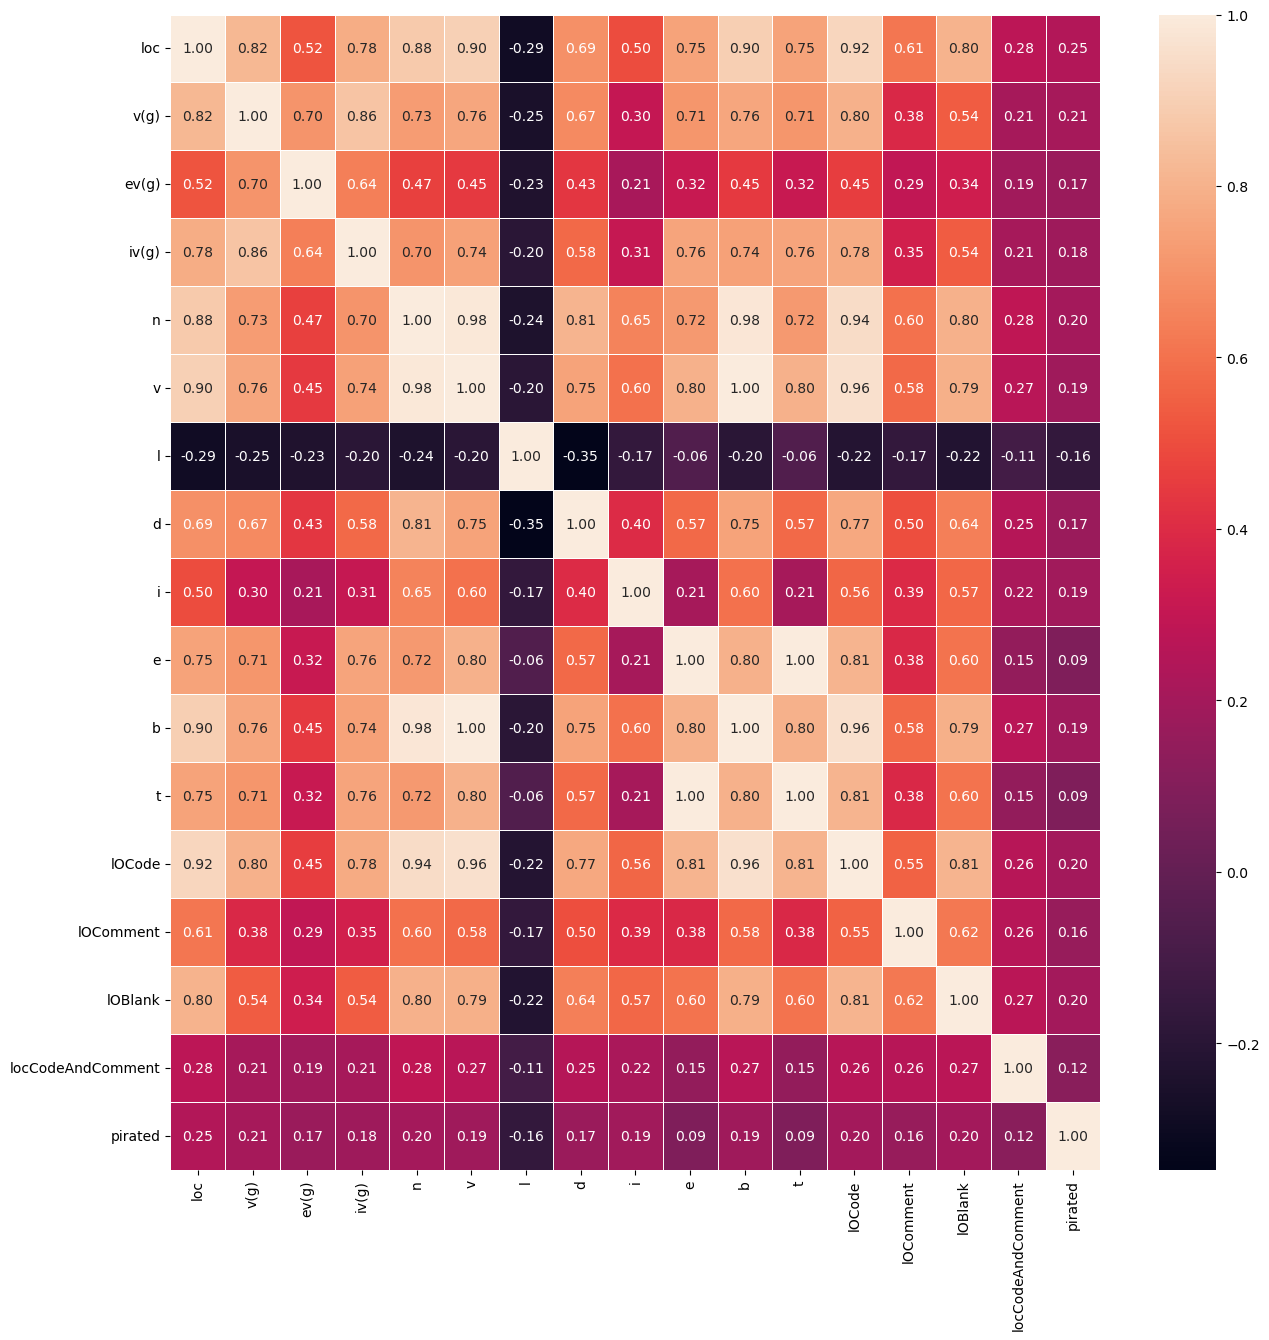

In [12]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

> *The light color in the heat map indicates that the covariance is high. (Ex. "v-b" , "v-n", etc.)*

> *The dark color in the heat map indicates that the covariance is low. (Ex. "loc-l" , "l-d", etc.)*

> * **Scatter Plot **

> **Data Preprocessing**

In [13]:
df.isnull().sum() #shows how many of the null

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
pirated              0
target               0
dtype: int64

> *No missing value. *

> *No data cleaning needed because the data is all important.*

>*  **Outlier Detection (Box Plot)**

In [14]:
trace1 = go.Box(
    x = df.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

*Showing all information when clicking on plot (min, max, q1, q2, etc.).*

>*  **Feature Extraction**

In [15]:
def evaluation_control(df):    
    evaluation = (df.n < 300) & (df.v < 1000 ) & (df.d < 50) & (df.e < 500000) & (df.t < 5000)
    df['complexityEvaluation'] = pd.DataFrame(evaluation)
    df['complexityEvaluation'] = ['Genuine' if evaluation == True else 'Pirated' for evaluation in data.complexityEvaluation]

In [16]:
evaluation_control(df)
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,pirated,target,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,1.2,1.2,1.2,1.2,1.4,False,genuine,Genuine
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,True,Pirated,Genuine
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,8,1,17,36,112,86,13,True,Pirated,Pirated
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,28,2,17,135,329,271,5,True,Pirated,Pirated
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,6,0,11,16,76,50,7,True,Pirated,Genuine


In [17]:
df.groupby("complexityEvaluation").size() #complexityEvalution rates (Succesfull/redisgn)

complexityEvaluation
Genuine    9160
Pirated    1725
dtype: int64

In [18]:
# Histogram
trace = go.Histogram(
    x = df.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'green')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Genuine- Pirated'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

# plt.figure()
# sns.countplot(x='target', data=df)


## Data Normalization  (Min-Max Normalization)

In [19]:
from sklearn import preprocessing

scale_v = df[['v']]
scale_b = df[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

df['v_ScaledUp'] = pd.DataFrame(v_scaled)
df['b_ScaledUp'] = pd.DataFrame(b_scaled)

df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,pirated,target,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.2,1.2,1.2,1.2,1.4,False,genuine,Genuine,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,True,Pirated,Genuine,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,17,36,112,86,13,True,Pirated,Pirated,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,17,135,329,271,5,True,Pirated,Pirated,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,11,16,76,50,7,True,Pirated,Genuine,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,10,15,30,22,7,False,genuine,Genuine,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,12,8,19,11,3,False,genuine,Genuine,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,18,15,59,44,7,False,genuine,Genuine,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,9,8,21,15,1,False,genuine,Genuine,0.001820,0.001855


# MODEL SELECTION
### We will be using three algorithm;
- Naive Bayes
- Random Forest 
- Support Vector Machine
- Ensemble Learning (Hybridised Algorithm)

## NAIVE BAYES ALGORITHM

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = df.iloc[:, :-10].values  #Select related attribute values for selection
Y = df.complexityEvaluation.values   #Select classification attribute values

In [21]:
#Parsing selection and verification datasets
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [22]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [23]:
#Calculation of ACC value by K-fold cross validation of NB model
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits = 10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)*100

In [24]:
cv_results

array([97.90026247, 98.29396325, 96.9816273 , 98.16272966, 97.76902887,
       98.29396325, 98.16272966, 97.90026247, 97.76902887, 97.50328515])

In [25]:
msg = "Mean : %f - Std : (%f)" % (cv_results.mean(), cv_results.std())
msg

'Mean : 97.873688 - Std : (0.384271)'

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [27]:
print(y_pred[:100])

['Genuine' 'Genuine' 'Pirated' 'Genuine' 'Genuine' 'Genuine' 'Genuine'
 'Genuine' 'Pirated' 'Genuine' 'Pirated' 'Genuine' 'Pirated' 'Genuine'
 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine'
 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Pirated'
 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Pirated' 'Genuine'
 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Pirated' 'Genuine'
 'Genuine' 'Pirated' 'Genuine' 'Genuine' 'Genuine' 'Pirated' 'Genuine'
 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine'
 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine'
 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine'
 'Genuine' 'Genuine' 'Genuine' 'Pirated' 'Genuine' 'Genuine' 'Genuine'
 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine'
 'Pirated' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Genuine'
 'Genuine' 'Genuine' 'Genuine' 'Genuine' 'Pirated' 'Pirated' 'Genuine'
 'Genu

In [28]:
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

     Genuine       0.99      0.99      0.99      1858
     Pirated       0.93      0.94      0.94       319

    accuracy                           0.98      2177
   macro avg       0.96      0.97      0.96      2177
weighted avg       0.98      0.98      0.98      2177

[[1836   22]
 [  18  301]]
ACC:  0.9816260909508497


>*When we look at the values, the fact that the values are close to zero shows us that the model has good predictive ability.*

>* # RANDOM FOREST ALGORITHM

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly
# import plotly.express as px

In [30]:
mydata = pd.read_csv('Datasets/software-data.csv')
mydata.shape

(10885, 23)

In [31]:
mydata.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,pirated,target
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,genuine
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,True,Pirated
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17,36,112,86,13,True,Pirated
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17,135,329,271,5,True,Pirated
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11,16,76,50,7,True,Pirated


In [32]:
mydata.columns = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment',
              'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd',
              'branchCount', 'target', 'pirated']

# Exploratory Data Analysis

In [33]:
for i in mydata.columns:
    if mydata[i].dtype == 'object':
        mydata[i] = pd.factorize(df[i])[0]

In [34]:
mydata.groupby(['pirated'])['target'].value_counts()


pirated  target
0        False     8779
1        True      2106
Name: target, dtype: int64

In [35]:
pd.crosstab(mydata['pirated'],mydata['target'])

target,False,True
pirated,,
0,8779,0
1,0,2106


## Feature selection

In [36]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif

In [37]:
y = mydata.target

In [38]:
mydata.drop('target',axis =1,inplace=True)

In [39]:
x = mydata

In [40]:
vrt = VarianceThreshold(threshold=0.01)
vrt.fit(x,y)

VarianceThreshold(threshold=0.01)

In [41]:
sum(vrt.get_support())

22

In [42]:
X = vrt.transform(mydata)

In [43]:
chi2_selector = SelectKBest(chi2, k=11)
X_kbest = chi2_selector.fit_transform(X, y)

In [44]:
X_kbest.shape

(10885, 11)

In [45]:
mut_feat = mutual_info_classif(X_kbest,y)
mut_feat

array([0.04643929, 0.0360607 , 0.03965451, 0.04682477, 0.04306057,
       0.04178029, 0.04269215, 0.03687637, 0.03069257, 0.03369335,
       0.4913178 ])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_kbest,y,test_size=0.15,random_state=1)

In [48]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [49]:
lr.score(X_train,y_train)

0.8108517077388673

In [50]:
cross_val_score(lr,X_train,y_train,cv=5)

array([0.80983252, 0.81361426, 0.81243243, 0.80756757, 0.80972973])

In [51]:
lr.score(X_test,y_test)

0.7966932026944274

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=9,max_depth=5,n_estimators=10)

In [53]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=9, n_estimators=10)

In [54]:
rf.score(X_train,y_train)

1.0

In [55]:
cross_val_score(rf,X_train,y_train,cv=5)

array([1., 1., 1., 1., 1.])

In [56]:
rf.feature_importances_

array([0.00749856, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.99250144])

In [57]:
rf.score(X_test,y_test)

1.0

In [58]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc

In [59]:
y_pred = rf.predict(X_test)

In [60]:
print(y_pred[10:])

[ True False False ... False False  True]


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1301
        True       1.00      1.00      1.00       332

    accuracy                           1.00      1633
   macro avg       1.00      1.00      1.00      1633
weighted avg       1.00      1.00      1.00      1633



In [62]:
roc_auc_score(y_test,y_pred)

1.0

## SUPPORT VECTOR MACHINE ALGORITHM

In [63]:
# Packages for analysis

import pickle
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

In [64]:
# Read in muffin and cupcake ingredient data
data = pd.read_csv('Datasets/software.csv')
data.drop(data[data["target"] == "bugs"].index, inplace=True)

data = data.sample(n=19)
data

,uniq_Opnd,total_Op,total_Opnd,branchCount,target
1367,5.1,3.5,1.4,0.3,pirated
10402,6.9,3.1,4.9,1.5,genuine
6679,5.7,2.6,3.5,1.0,genuine
5945,5.7,3.0,4.2,1.2,genuine
6620,5.4,3.4,1.7,0.2,pirated
2833,6.3,2.8,5.1,1.5,genuine
2005,5.7,2.8,4.5,1.3,genuine
6607,5.0,3.4,1.5,0.2,pirated
1251,6.4,3.2,4.5,1.5,genuine
9959,5.2,2.7,3.9,1.4,genuine


In [65]:
data.info

<bound method DataFrame.info of        uniq_Opnd  total_Op  total_Opnd  branchCount   target
1367         5.1       3.5         1.4          0.3  pirated
10402        6.9       3.1         4.9          1.5  genuine
6679         5.7       2.6         3.5          1.0  genuine
5945         5.7       3.0         4.2          1.2  genuine
6620         5.4       3.4         1.7          0.2  pirated
2833         6.3       2.8         5.1          1.5  genuine
2005         5.7       2.8         4.5          1.3  genuine
6607         5.0       3.4         1.5          0.2  pirated
1251         6.4       3.2         4.5          1.5  genuine
9959         5.2       2.7         3.9          1.4  genuine
3607         5.0       3.4         1.5          0.2  pirated
2872         4.6       3.6         1.0          0.2  pirated
6650         7.0       3.2         4.7          1.4  genuine
2378         6.4       2.8         5.6          2.1  genuine
7233         5.5       4.2         1.4          0.2  

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



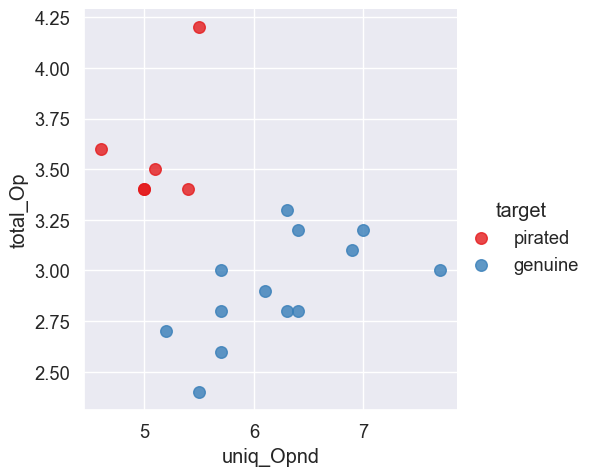

In [66]:
# Plot two ingredients
sns.lmplot('uniq_Opnd', 'total_Op', data=data, hue='target',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [67]:
# Specify inputs for the model
status = data[['uniq_Opnd', 'total_Op']].to_numpy()
type_label = np.where(data['target'] == "pirated", 0, 1)
print(np.unique(type_label))

# Feature names
data_features = data.columns.values[1:].tolist()
data_features

[0 1]


['total_Op', 'total_Opnd', 'branchCount', 'target']

In [68]:
model = svm.SVC(kernel='linear')
model.fit(status, type_label)

print("SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)")

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)


In [69]:
model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(status, type_label)

SVC(kernel='linear')

In [70]:

model = svm.SVC(kernel='linear')
model.fit(status, type_label)

SVC(kernel='linear')

In [71]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 7)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



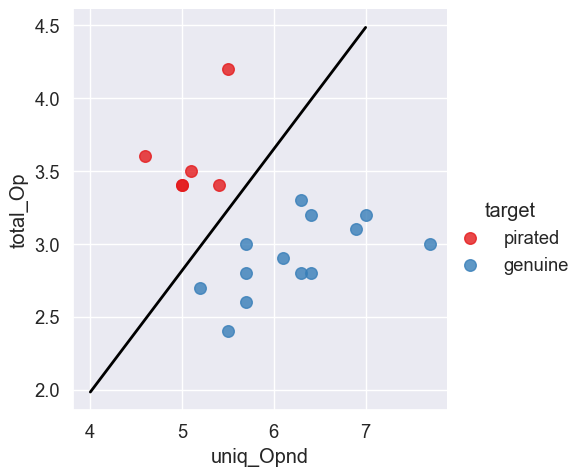

In [72]:
# Plot the hyperplane
sns.lmplot('uniq_Opnd', 'total_Op', data=data, hue='target',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



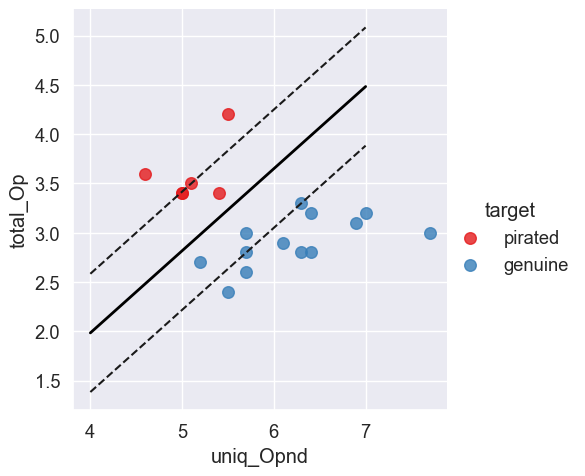

In [73]:
# Look at the margins and support vectors
sns.lmplot('uniq_Opnd', 'total_Op',  data=data, hue='target',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none')

In [74]:
# Create a function to guess when a recipe is a muffin or a cupcake
def pirated_or_unpirated(uniq_Opnd, total_Op):
    if (model.predict([[uniq_Opnd, total_Op]])) == 0:
        print('These are Pirated Software')
    else:
        print('These Software are Unpirated')

In [75]:
# Predict if 50 parts flour and 20 parts sugar
pirated_or_unpirated(4.9, 3.1)

These are Pirated Software


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



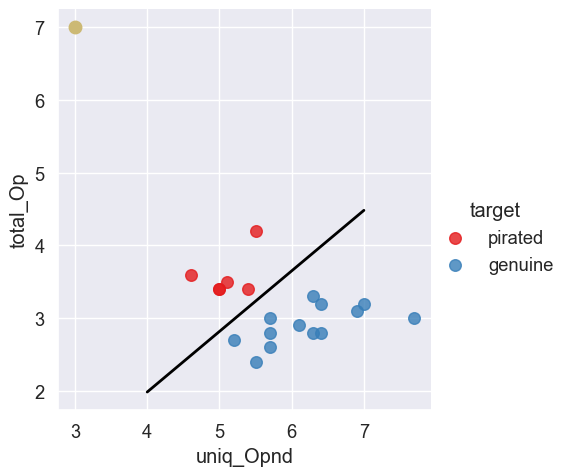

In [76]:
# Plot the point to visually see where the point lies
sns.lmplot('uniq_Opnd', 'total_Op', data=data, hue='target',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(3, 7, 'yo', markersize='9')

## HYBRIDIZED ALGORITHM

In [77]:
# Import the Libraries

import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [78]:
# Import Data

df = pd.read_csv('Datasets/test.csv')
df.head()

,softwarename,hashvalue,licensekey,branchCount,target
0,MS Office,FGTHJDGRHS,AS45FG-GFT65F-QWR4H-JH52D,1,pirated
1,CoraelDraw,VBNHGFRETY,AS45FG-GFL65F-QWR4H-JH52D,2,pirated
2,Audacity,HJDGHUYETG,AS45FG-GFT95F-QWR4H-JH52D,3,pirated
3,Sibelus,KLJHGTRSDA,AS45FG-GFO65F-QWR4H-JH52D,4,pirated
4,Photoshop,GHFKLOIUYT,AS45FG-GFT65F-UWR4H-JH52D,5,pirated


In [79]:
data = df.drop(columns=['softwarename', 'hashvalue', 'licensekey'])
data


,branchCount,target
0,1,pirated
1,2,pirated
2,3,pirated
3,4,pirated
4,5,pirated
...,...,...
10879,27,genuine
10880,28,genuine
10881,29,genuine
10882,30,genuine


## Basic Data Analysis

In [80]:
data.head()

,branchCount,target
0,1,pirated
1,2,pirated
2,3,pirated
3,4,pirated
4,5,pirated


In [81]:
data.shape

(10884, 2)

### Preprocess Data

In [82]:
# data['target'].replace(['pirated', 'unpirated', 'bugs'], [3, 2, 1], inplace=True)

In [83]:
data.head()

,branchCount,target
0,1,pirated
1,2,pirated
2,3,pirated
3,4,pirated
4,5,pirated


### Import the Machine learning Models

In [84]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [85]:
array = data.values
X = array[:, 0:1]
Y = array[:, 1]
seed = 7
num_trees = 30

In [86]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

1.0


In [87]:
data_input = X
# data_input

In [88]:
data_output = Y
# data_output

In [89]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)

In [90]:
print("Train Set       Test Set      ")
for train_set, test_set in kf.split(data_input):
    print(train_set, test_set)

Train Set       Test Set      
[    0     1     2 ... 10879 10882 10883] [    4     6    12 ... 10874 10880 10881]
[    1     2     3 ... 10881 10882 10883] [    0    24    25 ... 10860 10868 10879]
[    0     1     3 ... 10880 10881 10882] [    2     7     9 ... 10869 10871 10883]
[    0     2     3 ... 10880 10881 10883] [    1    11    14 ... 10875 10878 10882]
[    0     1     2 ... 10881 10882 10883] [    3     5     8 ... 10852 10876 10877]


In [91]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators=10)

In [92]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf_class,data_input,data_output,scoring='accuracy',cv=10))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [93]:
accuracy = cross_val_score(rf_class,data_input,data_output,scoring='accuracy',cv=10).mean()*100
print('Accuracy of Random Forests is: ',accuracy)

Accuracy of Random Forests is:  100.0


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Build Machine Learning Model

In [99]:
clf = RandomForestClassifier()

In [100]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

### Test ML Model

In [101]:
test = clf.predict(X_test)
test

array(['genuine', 'pirated', 'pirated', ..., 'genuine', 'genuine',
       'genuine'], dtype=object)

### Check for Efficacy

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
accuracy = accuracy_score(Y_test, test)*100
accuracy

100.0

### Save the Models

In [104]:
import joblib

joblib.dump(clf, 'piracy_tracker.joblib')

['piracy_tracker.joblib']

In [105]:
joblib.load('piracy_tracker.joblib')

RandomForestClassifier()

In [106]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [107]:
c_matrix = confusion_matrix(Y_test, test)
c_matrix

array([[1470,    0],
       [   0,  707]], dtype=int64)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



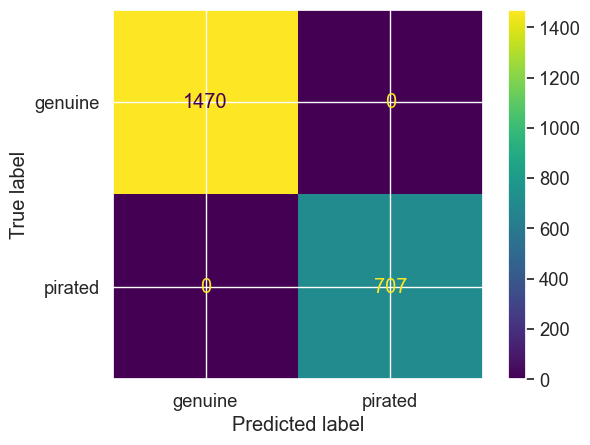

In [108]:
plot_confusion_matrix(clf, X_test, Y_test);

In [109]:
Y_test

array(['genuine', 'pirated', 'pirated', ..., 'genuine', 'genuine',
       'genuine'], dtype=object)

In [110]:
print(classification_report(Y_test, test))

              precision    recall  f1-score   support

     genuine       1.00      1.00      1.00      1470
     pirated       1.00      1.00      1.00       707

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

